# Healthcare Covid-19 Analysis
The objective of this project is to analyze Covid-19 healthcare data to understand trends in cases and deaths over time and across regions.The analysis aims to provide insights into the spread and impact of Covid-19 using data-driven techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [4]:
#In the dataset,DATE_DIED= "9999-99-99" the patient did not die, 1= Yes and 2 = No,97/99 = Missing
df["Died"] = df["DATE_DIED"] != "9999-99-99"
df["Died"] = df["Died"].astype(int)
df["Died"].value_counts()

Died
0    971633
1     76942
Name: count, dtype: int64

# Death Indicator
A binary death indicator was created based on the DATE_DIED feild.Patients with a valid death date were marked as deceased.

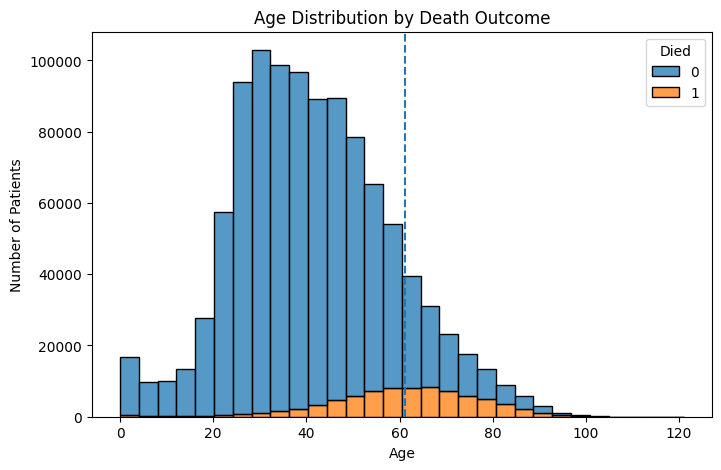

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="AGE", hue="Died", bins=30, multiple="stack")
plt.axvline(df[df["Died"] == 1]["AGE"].mean(), linestyle="--", label="Avg Age (Died)")
plt.title("Age Distribution by Death Outcome")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()
# Result shows that mortality increases sharply with age,with deaths concentrated among older patients.

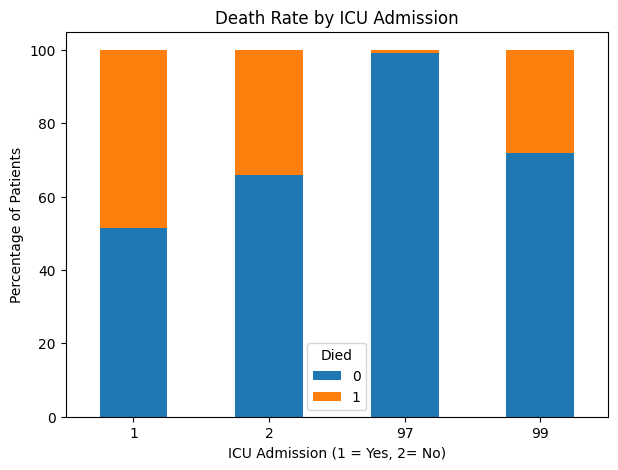

In [17]:
icu_death = pd.crosstab(df["ICU"], df["Died"], normalize="index") * 100
icu_death.plot(
    kind="bar",
    stacked=True,
    figsize=(7,5)
)
plt.title("Death Rate by ICU Admission")
plt.ylabel("Percentage of Patients")
plt.xlabel("ICU Admission (1 = Yes, 2= No)")
plt.xticks(rotation=0)
plt.legend(title="Died")
plt.show()
# Result shows that ICU patients represent the most severe cases, reflected in higher mortality

In [10]:
conditions = [
    "DIABETES",
    "HIPERTENSION",
    "OBESITY",
    "CARDIOVASCULAR",
    "RENAL_CHRONIC"
]
death_rates ={}

for col in conditions:
    rate = df[df[col] == 1]["Died"].mean() * 100
    death_rates[col] = rate

death_rates_df = pd.DataFrame.from_dict(
    death_rates, orient="index", columns=["Death Rate (%)"]
)

death_rates_df.sort_values(by="Death Rate (%)", ascending=False)

,Death Rate (%)
RENAL_CHRONIC,30.189378
DIABETES,22.613990
CARDIOVASCULAR,21.353941
HIPERTENSION,19.702081
OBESITY,10.821194


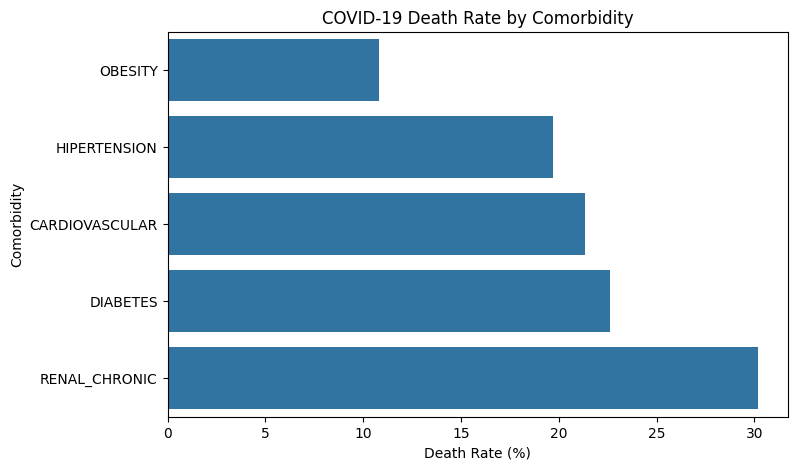

In [19]:
death_rates_df_sorted = death_rates_df.sort_values("Death Rate (%)")
plt.figure(figsize=(8,5))
sns.barplot(
    x=death_rates_df_sorted["Death Rate (%)"],
    y=death_rates_df_sorted.index
)
plt.title("COVID-19 Death Rate by Comorbidity")
plt.xlabel("Death Rate (%)")
plt.ylabel("Comorbidity")
plt.show()

In [20]:
df["Covid_Positive"] = df["CLASIFFICATION_FINAL"] <= 3

covid_death = df.groupby("Covid_Positive")["Died"].mean() * 100
covid_death

Covid_Positive
False     3.458139
True     13.836456
Name: Died, dtype: float64

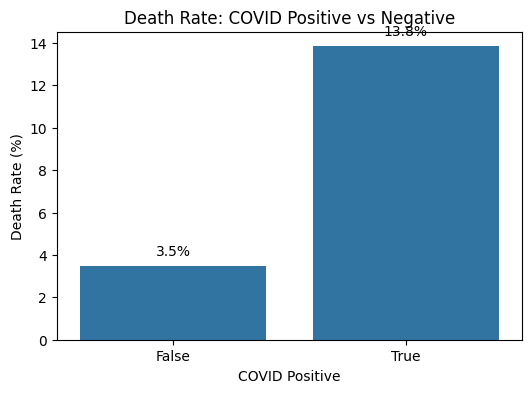

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=covid_death.index,
    y=covid_death.values
)
for i, v in enumerate(covid_death.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.title("Death Rate: COVID Positive vs Negative")
plt.ylabel("Death Rate (%)")
plt.xlabel("COVID Positive")
plt.show()

## Conclusion
This analysis identified age, ICU admission, and pre-existing conditions such as diabetes,hypertension,and chronic kidney disease as key factors associated with Covid-19 mortality.The findings highlight the importance of targeted healthcare interventions for high-risk partient groups.